    Introduction
🚦🚨🚑🚔🚦🚨🚑🚔🚦🚨🚑🚔


1. Prepare the dataset

The first step is to prepare the dataset. This involves splitting the dataset into training, validation, and test sets. Typically, the training set is used to train the model, the validation set is used to evaluate the model during training, and the test set is used to evaluate the model after training.

For this dataset, you can split the data into a 70% training set, 15% validation set, and 15% test set. You can use a random split to ensure that the training, validation, and test sets are representative of the overall dataset.

Once the data is split, you need to preprocess the images. This may involve resizing the images, normalizing the pixel values, and converting the images to a format that the CNN model can understand.

2. Build the CNN model

Next, you need to build the CNN model. There are many different CNN architectures, but a simple CNN architecture that can be used for traffic sign classification is as follows:

Input layer
Convolutional layer (32 filters, 3x3 kernel size)
Max pooling layer (2x2 pooling size)
Convolutional layer (64 filters, 3x3 kernel size)
Max pooling layer (2x2 pooling size)
Flatten layer
Dense layer (128 neurons, ReLU activation)
Output layer (58 neurons, softmax activation)
This CNN model has two convolutional layers, each followed by a max pooling layer. The convolutional layers learn to extract features from the images, and the max pooling layers reduce the size of the feature maps. The flatten layer converts the feature maps into a one-dimensional vector. The dense layer learns to classify the feature vectors into the different traffic sign classes.

3. Train the CNN model

Once the CNN model is built, you need to train the model on the training data. This involves feeding the training images and their corresponding labels to the model and adjusting the model's parameters so that it can accurately predict the labels of the training data.

You can use a variety of different optimizers to train the CNN model. A popular optimizer for training CNN models is Adam.

4. Evaluate the CNN model

Once the CNN model is trained, you need to evaluate its performance on the validation set. This will give you an idea of how well the model will generalize to new data.

To evaluate the model, you can calculate the accuracy of the model on the validation set. The accuracy is the percentage of validation images that the model correctly classifies.


Conclusion

By following these steps, you can use a basic CNN model to classify traffic signs using the given dataset. You can expect to get decent validation accuracy using this approach.

Here are some additional tips for improving the performance of your CNN model:

Use a larger dataset. The more data you have, the better the model will be able to learn the patterns in the data.
Use a more complex CNN architecture. There are many different CNN architectures that you can use. More complex architectures typically have more convolutional layers and more neurons in the dense layers.
Use data augmentation. Data augmentation is a technique that can be used to artificially increase the size of the dataset. This can help to improve the performance of the model and prevent overfitting.
Use regularization techniques. Regularization techniques can help to prevent overfitting by penalizing complex models.
Optimize the hyperparameters. The hyperparameters of the CNN model, such as the learning rate and the number of epochs, can have a significant impact on the performance of the model. You can use a variety of different techniques to optimize the hyperparameters.

In [23]:
from google.colab import files
from IPython.display import Image

In [24]:
uploaded=files.upload()

Saving traffic_sign_classification_phases.jpg to traffic_sign_classification_phases (1).jpg


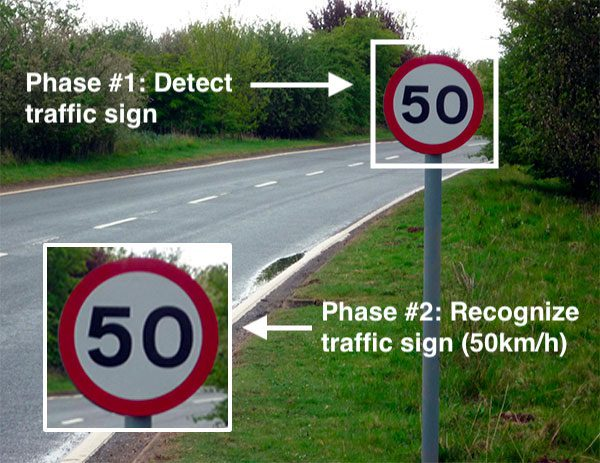

In [25]:
Image('traffic_sign_classification_phases.jpg',width =525)

# Import Datasets from kaggle

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np

In [4]:
od.download('https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kishan8882317371
Your Kaggle Key: ··········


100%|██████████| 190M/190M [00:01<00:00, 154MB/s]


In [14]:
file=('/content/traffic-sign-dataset-classification/labels.csv')


In [15]:
df=pd.read_csv(file)

In [20]:
df['Name']

0              Speed limit (5km/h)
1             Speed limit (15km/h)
2             Speed limit (30km/h)
3             Speed limit (40km/h)
4             Speed limit (50km/h)
5             Speed limit (60km/h)
6             Speed limit (70km/h)
7             speed limit (80km/h)
8         Dont Go straight or left
9        Dont Go straight or Right
10                Dont Go straight
11                    Dont Go Left
12           Dont Go Left or Right
13                   Dont Go Right
14         Dont overtake from Left
15                        No Uturn
16                          No Car
17                         No horn
18            Speed limit (40km/h)
19            Speed limit (50km/h)
20            Go straight or right
21                     Go straight
22                         Go Left
23                Go Left or right
24                        Go Right
25                       keep Left
26                      keep Right
27            Roundabout mandatory
28              watc

In [21]:
df.shape

(58, 2)

# Import basic libraries


In [32]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import warnings

In [37]:
dataset=('traffic-sign-dataset-classification')

Split data

In [40]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset = "training",
                                                               image_size = (224,224),
                                                               seed = 100, batch_size=32)

Found 6164 files belonging to 1 classes.
Using 4932 files for training.


In [41]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset = "validation",
                                                               image_size = (224,224),
                                                               seed = 100, batch_size=32)

Found 6164 files belonging to 1 classes.
Using 1232 files for validation.


In [43]:
class_name=train_ds.class_names

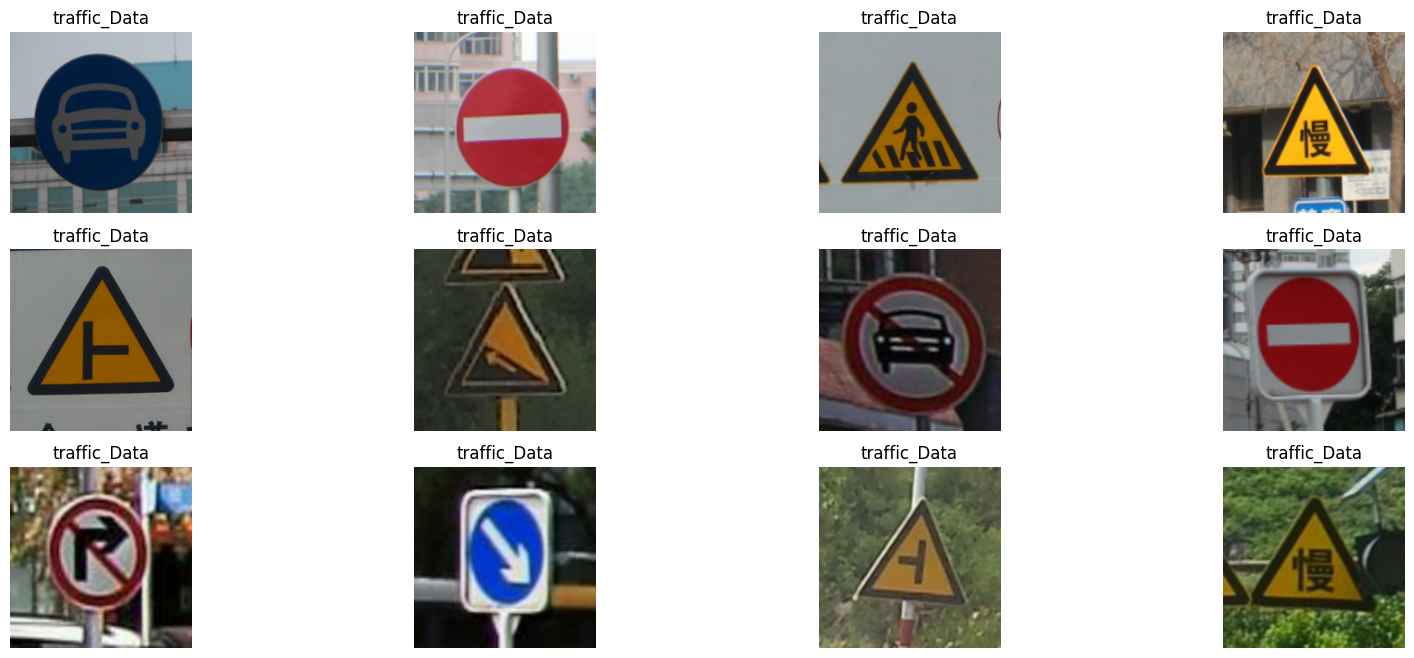

In [45]:
plt.figure(figsize=(20, 8))
for image_batch,label_batch in train_ds.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

Creation of CNN model

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical# change the category of different classes
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [14]:
model=Sequential()
model.add(Rescaling(1.0/255))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dense(58,activation="softmax"))

In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",
              metrics=["Accuracy"])

In [16]:
# we can set the callback earlystopping function
define_callbacks=[EarlyStopping(monitor="val_loss",patience=3)]

history=model.fit(train_ds,validation_data=val_ds,epochs=5,callbacks=define_callbacks,batch_size=128)

Epoch 1/5
155/155 [==============================] - 1557s 10s/step - loss: 0.0449 - Accuracy: 0.9874 - val_loss: 0.0000e+00 - val_Accuracy: 1.0000
Epoch 2/5
155/155 [==============================] - 1517s 10s/step - loss: 0.0000e+00 - Accuracy: 1.0000 - val_loss: 0.0000e+00 - val_Accuracy: 1.0000
Epoch 3/5
155/155 [==============================] - 1529s 10s/step - loss: 0.0000e+00 - Accuracy: 1.0000 - val_loss: 0.0000e+00 - val_Accuracy: 1.0000
Epoch 4/5
155/155 [==============================] - 1527s 10s/step - loss: 0.0000e+00 - Accuracy: 1.0000 - val_loss: 0.0000e+00 - val_Accuracy: 1.0000


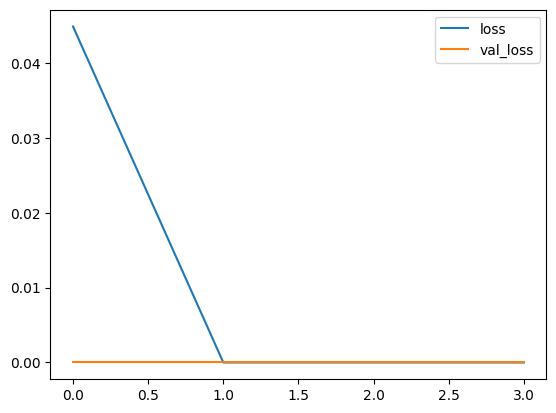

In [17]:
#plotting of graph
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss","val_loss"])

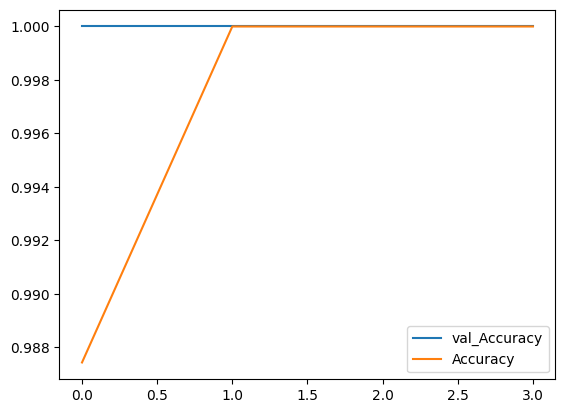

In [22]:
plt.plot(history.history["val_Accuracy"])
plt.plot(history.history["Accuracy"])
plt.legend(["val_Accuracy","Accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7